In [ ]:
print('Nkosiphendule')

Nkosiphendule


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/student_performance_large_dataset.csv')

In [6]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [11]:
df.shape

(10000, 15)

In [12]:
df.isna().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [43]:
df.describe(include='all')

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,total score,average
count,10000.000000,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,NaN,3,NaN,4,NaN,2,NaN,NaN,NaN,2,3,NaN,NaN,4,NaN,NaN
top,NaN,Female,NaN,Visual,NaN,Yes,NaN,NaN,NaN,Yes,Medium,NaN,NaN,A,NaN,NaN
freq,NaN,4846,NaN,2523,NaN,5996,NaN,NaN,NaN,7022,5015,NaN,NaN,2678,NaN,NaN
mean,23.478800,NaN,27.130300,NaN,10.007900,NaN,74.922000,70.188900,75.085100,NaN,NaN,14.936500,6.979300,NaN,220.196000,73.398667
std,3.461986,NaN,13.002547,NaN,6.136726,NaN,14.675437,17.649447,14.749251,NaN,NaN,9.022639,1.996965,NaN,27.418643,9.139548
min,18.000000,NaN,5.000000,NaN,0.000000,NaN,50.000000,40.000000,50.000000,NaN,NaN,0.000000,4.000000,NaN,143.000000,47.666667
25%,20.000000,NaN,16.000000,NaN,5.000000,NaN,62.000000,55.000000,62.000000,NaN,NaN,7.000000,5.000000,NaN,201.000000,67.000000
50%,23.000000,NaN,27.000000,NaN,10.000000,NaN,75.000000,70.000000,75.000000,NaN,NaN,15.000000,7.000000,NaN,220.000000,73.333333
75%,27.000000,NaN,38.000000,NaN,15.000000,NaN,88.000000,85.000000,88.000000,NaN,NaN,23.000000,9.000000,NaN,240.000000,80.000000


In [15]:
df.nunique()


Student_ID                                 10000
Age                                           12
Gender                                         3
Study_Hours_per_Week                          45
Preferred_Learning_Style                       4
Online_Courses_Completed                      21
Participation_in_Discussions                   2
Assignment_Completion_Rate (%)                51
Exam_Score (%)                                61
Attendance_Rate (%)                           51
Use_of_Educational_Tech                        2
Self_Reported_Stress_Level                     3
Time_Spent_on_Social_Media (hours/week)       31
Sleep_Hours_per_Night                          7
Final_Grade                                    4
dtype: int64

In [35]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade', 'total score', 'average'],
      dtype='object')

In [37]:
df = df.drop(columns=['Student_ID'])

In [38]:
numerical_df = df.select_dtypes(include=['number'])

### Separate categorical columns
categorical_df = df.select_dtypes(include=['object'])

### Descriptive Analysis

In [39]:
numerical_df

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,total score,average
0,18,48,14,100,69,66,9,8,235,78.333333
1,29,30,20,71,40,57,28,8,168,56.000000
2,20,47,11,60,43,79,13,7,182,60.666667
3,23,13,0,63,70,60,24,10,193,64.333333
4,19,24,19,59,63,93,26,8,215,71.666667
...,...,...,...,...,...,...,...,...,...,...
9995,20,30,6,62,58,76,17,6,196,65.333333
9996,23,16,8,54,84,86,6,5,224,74.666667
9997,26,23,3,54,40,70,20,8,164,54.666667
9998,18,41,7,66,45,90,6,8,201,67.000000


### # Z-Scores

In [42]:
df_zscore = numerical_df.apply(zscore)  # Calculate z-scores for all columns
print("\nZ-Scores:")
df_zscore


Z-Scores:


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,total score,average
0,-1.582639,1.605127,0.650559,1.708927,-0.067365,-0.616001,-0.657989,0.511151,0.539952,0.539952
1,1.594887,0.220714,1.628328,-0.267263,-1.710558,-1.226232,1.447930,0.511151,-1.903763,-1.903763
2,-1.004907,1.528215,0.161674,-1.016852,-1.540573,0.265444,-0.214638,0.010366,-1.393136,-1.393136
3,-0.138309,-1.086788,-1.630902,-0.812418,-0.010703,-1.022822,1.004579,1.512721,-0.991929,-0.991929
4,-1.293773,-0.240757,1.465366,-1.084996,-0.407336,1.214692,1.226255,0.511151,-0.189516,-0.189516
...,...,...,...,...,...,...,...,...,...,...
9995,-1.004907,0.220714,-0.653133,-0.880563,-0.690645,0.062033,0.228714,-0.490419,-0.882509,-0.882509
9996,-0.138309,-0.856052,-0.327210,-1.425719,0.782562,0.740068,-0.990503,-0.991204,0.138745,0.138745
9997,0.728289,-0.317669,-1.142018,-1.425719,-1.710558,-0.344787,0.561228,0.511151,-2.049657,-2.049657
9998,-1.582639,1.066744,-0.490172,-0.607985,-1.427249,1.011282,-0.990503,0.511151,-0.700143,-0.700143


### 3.5 Check statistics of data set

In [16]:
### 3.5 Check statistics of data set
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [17]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [28]:
print("Categories in 'Gender' variable:  ",end=" ")
print(df['Gender'].unique())

print("Categories in 'Preferred_Learning_Style' variable:  ",end=" ")
print(df['Preferred_Learning_Style'].unique())

print("Categories in'Self_Reported_Stress_Level' variable:",end=" " )
print(df['Self_Reported_Stress_Level'].unique())

print("Categories in'Use_of_Educational_Tech' variable:",end=" " )
print(df['Use_of_Educational_Tech'].unique())

print("Categories in 'Online_Courses_Completed' variable:     ",end=" " )
print(df['Online_Courses_Completed'].unique())

print("Categories in 'Age' variable:     ",end=" " )
print(df['Age'].unique())

print("Categories in'Study_Hours_per_Week' variable:",end=" " )
print(df['Study_Hours_per_Week'].unique())

print("Categories in'Use_of_Educational_Tech' variable:",end=" " )
print(df['Use_of_Educational_Tech'].unique())



Categories in 'Gender' variable:   ['Female' 'Male' 'Other']
Categories in 'Preferred_Learning_Style' variable:   ['Kinesthetic' 'Reading/Writing' 'Auditory' 'Visual']
Categories in'Self_Reported_Stress_Level' variable: ['High' 'Medium' 'Low']
Categories in'Use_of_Educational_Tech' variable: ['Yes' 'No']
Categories in 'Online_Courses_Completed' variable:      [14 20 11  0 19  5 13 16  7 18  4 17  9  6  3  1 12 10  8  2 15]
Categories in 'Age' variable:      [18 29 20 23 19 28 27 22 25 24 26 21]
Categories in'Study_Hours_per_Week' variable: [48 30 47 13 24 26 49 14 45 35 40 44 10 28 11  8 41 36 38 39 23  6 25 32
 20 12 46 33 21  5 19 31  9 42  7 22 34 43 15 16 29 27 17 37 18]
Categories in'Use_of_Educational_Tech' variable: ['Yes' 'No']


In [29]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']

We have 7 categorical features : ['Student_ID', 'Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']


In [30]:
df.head(2)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D


### 3.8 Adding columns for "Total Score" and "Average"

In [33]:
df['total score'] = df['Assignment_Completion_Rate (%)'] + df['Exam_Score (%)'] + df['Attendance_Rate (%)']
df['average'] = df['total score']/3
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,total score,average
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,235,78.333333
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,168,56.000000
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,182,60.666667
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,193,64.333333
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,215,71.666667


### Visualizations

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

: 

### Histograms for each column

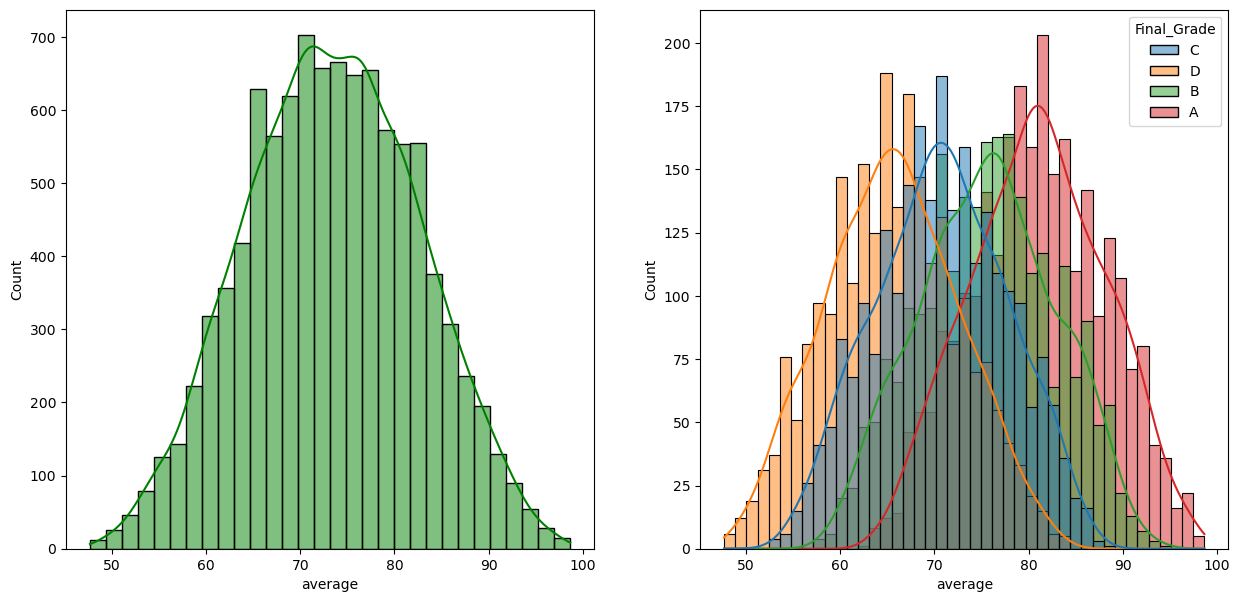

In [51]:

plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Final_Grade')
plt.show()

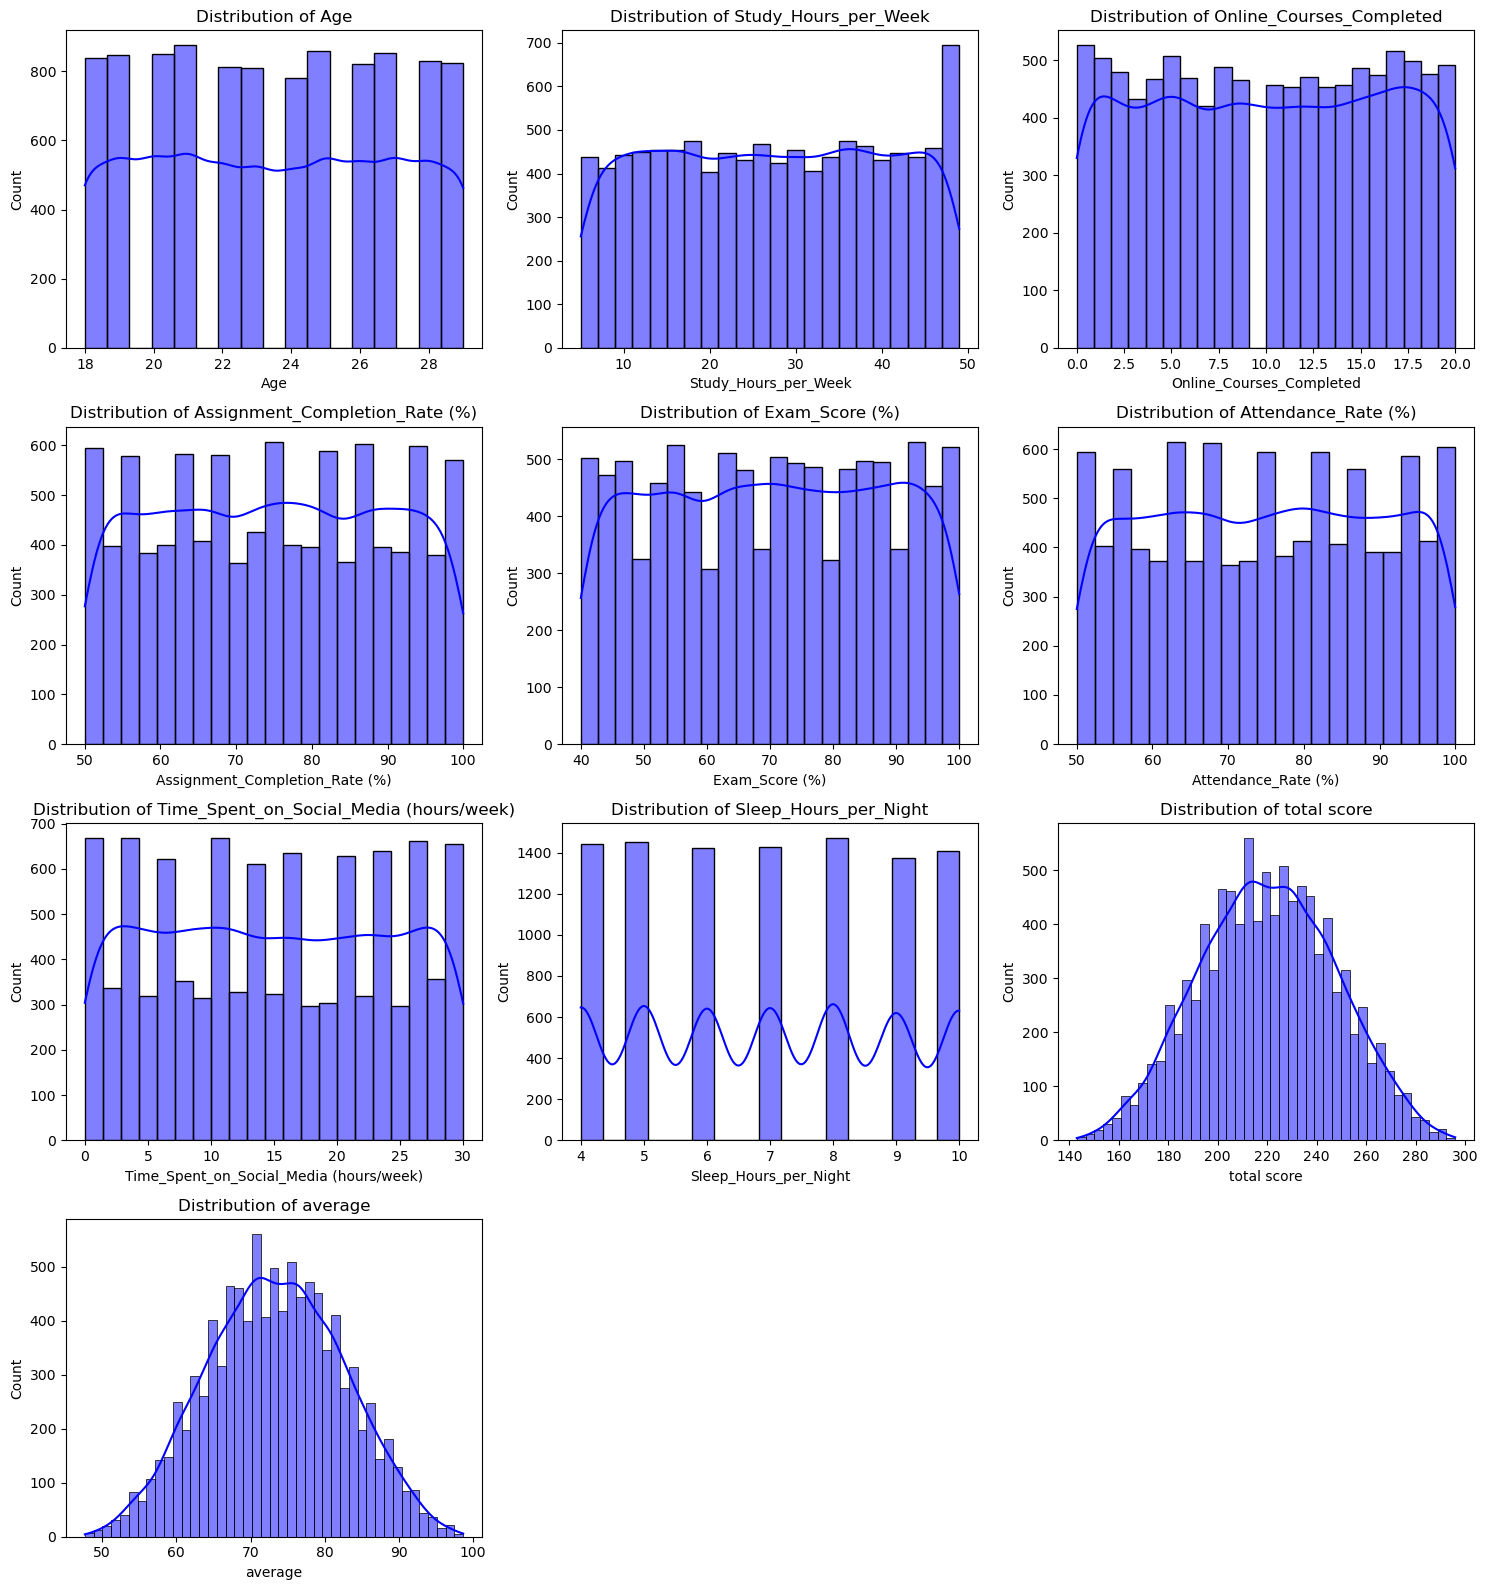

In [58]:
num_cols = len(numerical_df.columns)
rows = int(np.ceil(num_cols / 3))  # Adjust rows dynamically
cols = min(3, num_cols)  # Maximum 3 columns

plt.figure(figsize=(5 * cols, 4 * rows))  # Adjust figure size

# Histograms for each column
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(numerical_df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # Prevent overlap

plt.show()

### Boxplots for each column

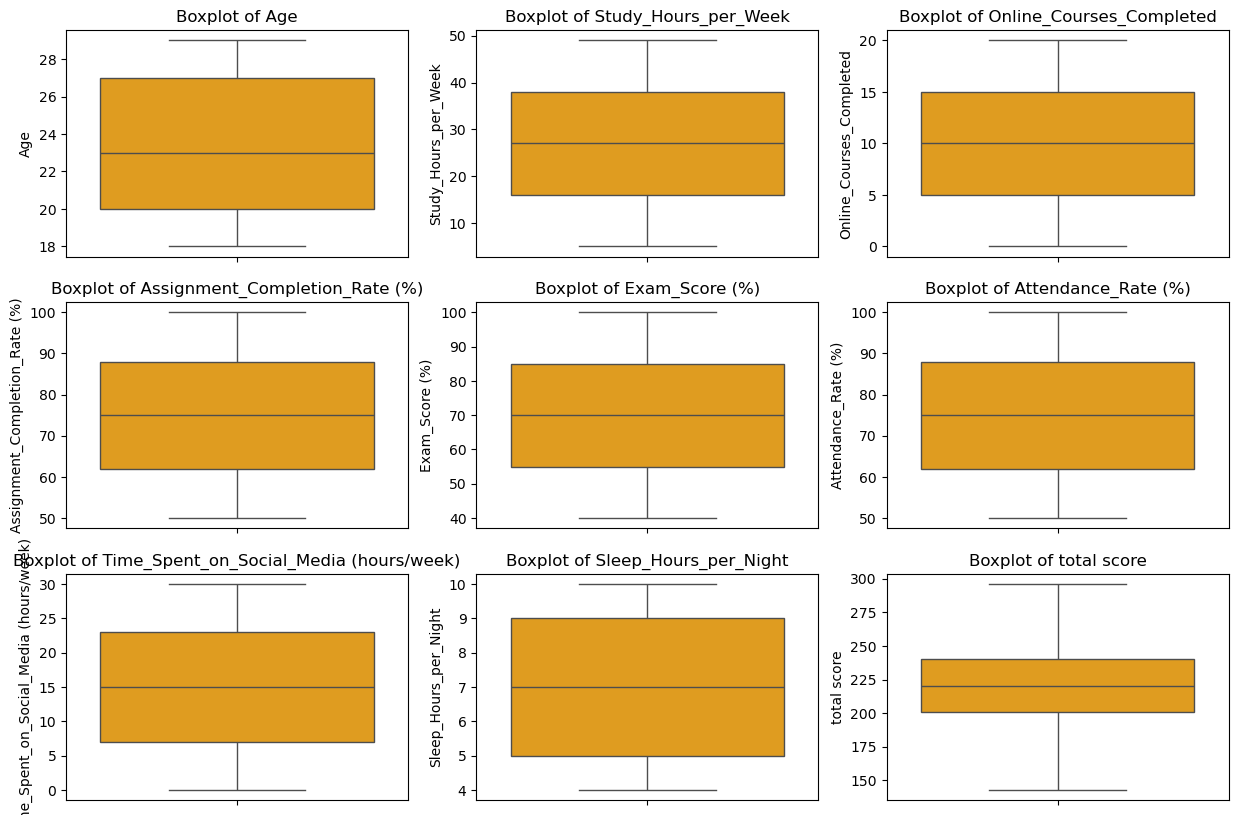

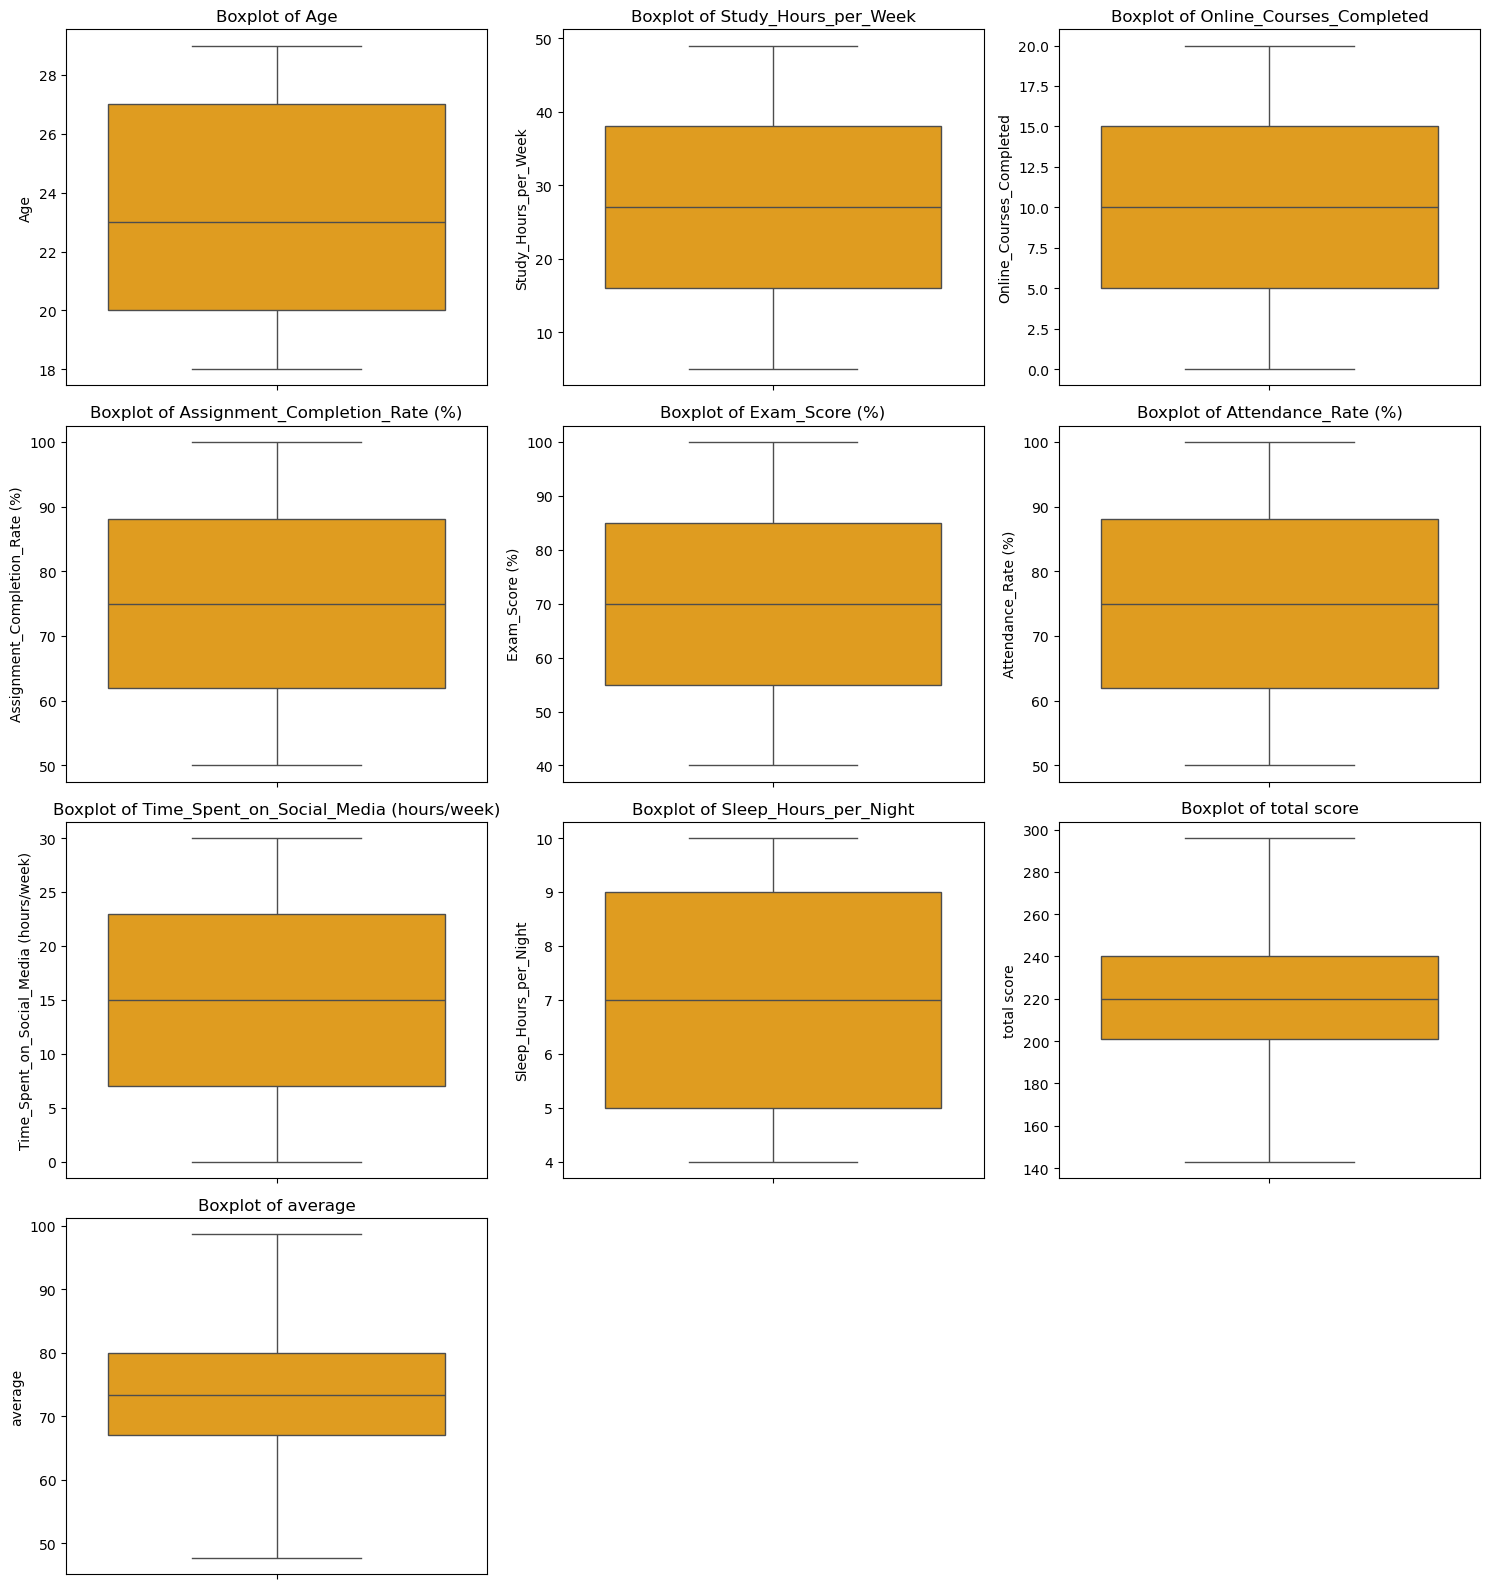

In [60]:

num_cols = len(numerical_df.columns)
rows = int(np.ceil(num_cols / 3))  # Dynamically calculate the number of rows
cols = min(3, num_cols)  # Ensure we don't exceed 3 columns

plt.figure(figsize=(5 * cols, 4 * rows))  # Adjust figure size dynamically

for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)  # Use dynamic rows & cols
    sns.boxplot(y=numerical_df[column], color='orange')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Prevent overlap

plt.show()

### Compute correlation matrix

In [ ]:

correlation_table = numerical_df.corr()  # Pearson (default)
# correlation_table = df.corr(method='spearman')  # Spearman rank correlation

print("Correlation Table:")
print(correlation_table)

: 

### Training A Model

In [74]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import warnings

### Machine Learning Model: Decision Tree

In [66]:
X= df.drop(columns=['Final_Grade'],axis = 1)
y = df['Final_Grade']
encoder = LabelEncoder()
categorical_col = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_col:
    X[col] = encoder.fit_transform(X[col])

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 2: Train and visualize the decision tree

In [69]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Step 3: Evaluate

In [72]:

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


### Visualize the tree

<Figure size 1200x800 with 0 Axes>

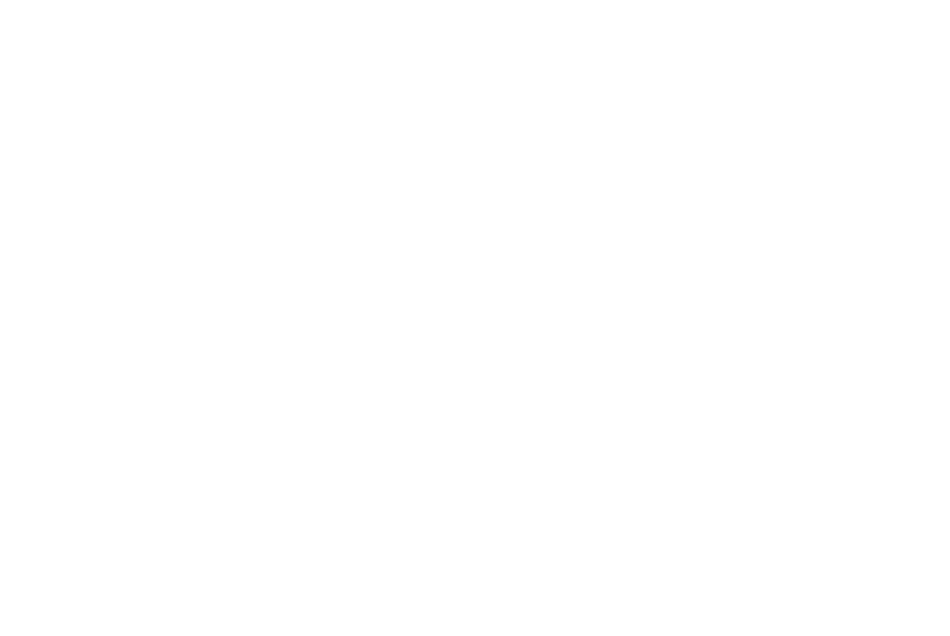

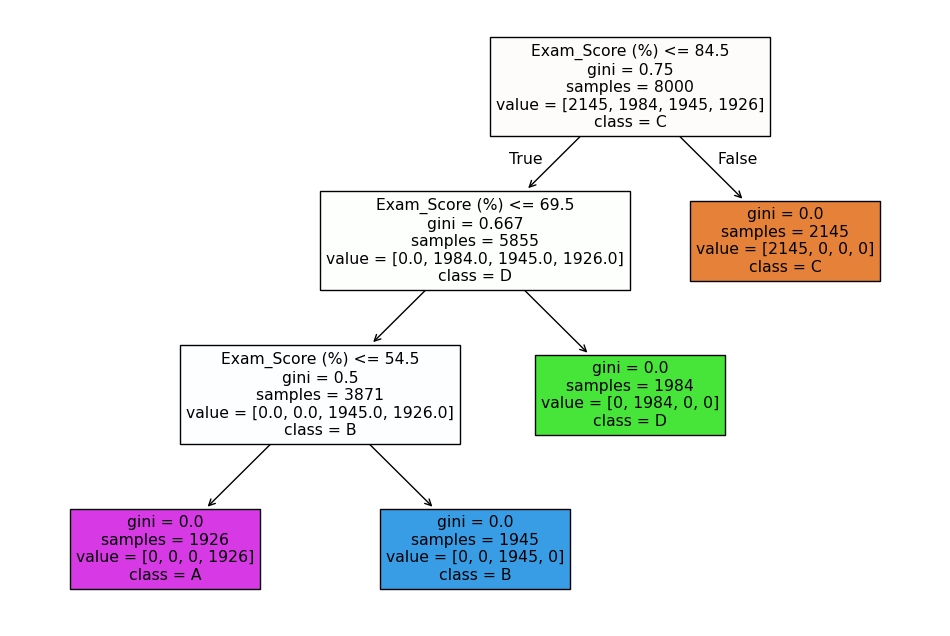

In [76]:

# Ensure class_names matches unique classes in y
class_labels = list(map(str, y.unique()))  # Convert class labels to strings

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=class_labels)
plt.show()
